# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-13 (Stand: Mai 2024)

[Raum F1-09](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Interferenz

Tin Vrkic E-Mail: uyvpq@studen.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Mika Noch E-Mail: uttzi@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Shuran Liu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 27.06.2024

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/README.md).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kafe2
from uncertainties import ufloat, unumpy as unp
import pathlib

In [2]:
# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[], add_error=True, which=["x","y"]):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    if add_error:
        fit.add_error(axis = 'x', err_val = xy_error[0])
        fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

def weighted_mean_gauss(arr):
    res = np.sum( unp.nominal_values(arr) / unp.std_devs(arr) ) / np.sum( 1 / unp.std_devs(arr) )
    return res

def std_weighted_mean_gauss(arr):
    N = unp.nominal_values(arr).size
    arr_bar = weighted_mean_gauss(arr)
    return np.sqrt( (N/(N-1)) * np.sum( (unp.nominal_values(arr)-arr_bar)**2 / unp.std_devs(arr) ) / np.sum( 1/unp.std_devs(arr) ) )

## Aufgabe 1: Newtonsche Ringe

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie den Brechungsindex von Wasser, sowie den Brechungsindex der verwendeten Linse durch die Beobachtung von Newtonschen Ringen.
 * Bearbeiten Sie hierzu die folgenden Aufgaben.
 
---

### Aufgabe 1.1 Krümmungsradius $R$ einer ausgewählten Linse

Bestimmen Sie den Krümmungsradius $R$ einer symmetrischen, sphärischen, plankonvexen Linse aus der Beobachtung der Newtonschen Ringe unter dem Mikroskop.

---

In dieser Aufgabe wurden durch das Objektiv eines Mikroskops die Newton'schen Ringe in Reflexion bei Bestrahlung einer Linse mit Krümmungsradius $R$ mit gelbem und blauem Licht und Luft als Zwischenmedium und bei Bestrahlung mit gelbem Licht und Wasser als Zwischenmedium beobachtet und die Durchmesser der ersten paar gut messbaren dunklen Ringe gemessen. Aus diesen Durchmessern bzw. Radien lässt sich der Krümmungsradius der Linse durch Anpassung folgendes Modells an die Messwerte bestimmen:
$$d_k=2\sqrt{kR\lambda}+C$$
Das Licht der gelben LED hat eine Wellenlänge von $\lambda_{gelb}=590\,nm$, das der blauen LED $\lambda_{blau}=465\,nm$

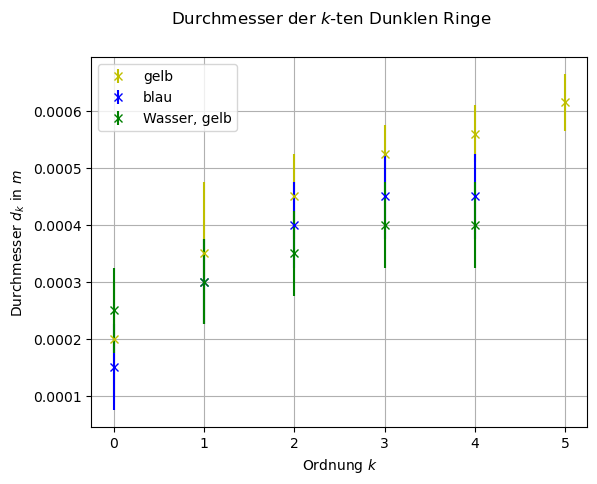

In [3]:
radien_newton_gelb = unp.uarray([ 23.4-23.0 , 23.5-22.8 , 23.6-22.7 , 23.7-22.65 , 23.72-22.6, 23.73-22.5 ] , [0.2 , 0.25 , 0.15, 0.1 , 0.1 , 0.1]) * 10**(-3) / 2  #meter
radien_newton_blau = unp.uarray([ 22.2-21.9 , 22.3-21.7 , 22.3-21.5 , 22.3-21.4 , 22.4-21.5 ] , [ 0.15 ]) * 10**(-3)/ 2  #meter
radien_newton_wasser = unp.uarray([ 23.0-22.5 , 23.1-22.5 , 23.1-22.4 , 23.2-22.4 , 23.2-22.4] , [ 0.15 ]) * 10**(-3)/ 2  #meter , mit gelbem Licht
k = np.arange(0,6)
lbda_gelb = 590 * 10**(-9) # Meter
lbda_blau = 465 * 10**(-9) # Meter

fig0, ax0 = plt.subplots()
ax0.errorbar(np.arange(unp.nominal_values(radien_newton_gelb).size) , unp.nominal_values(radien_newton_gelb), yerr=unp.std_devs(radien_newton_gelb),  fmt="yx", label="gelb")
ax0.errorbar(np.arange(unp.nominal_values(radien_newton_blau).size) , unp.nominal_values(radien_newton_blau), yerr=unp.std_devs(radien_newton_blau),  fmt="bx", label="blau")
ax0.errorbar(np.arange(unp.nominal_values(radien_newton_wasser).size) , unp.nominal_values(radien_newton_wasser), yerr=unp.std_devs(radien_newton_wasser),  fmt="gx", label="Wasser, gelb")
ax0.grid(), ax0.legend()

fig0.suptitle("Durchmesser der $k$-ten Dunklen Ringe")
ax0.set(xlabel="Ordnung $k$", ylabel="Durchmesser $d_k$ in $m$")
plt.show()

C:\Users\probz\AppData\Local\Temp\ipykernel_16756\1096968037.py:3: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_gelb) + c1
C:\Users\probz\AppData\Local\Temp\ipykernel_16756\1096968037.py:5: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_blau) + c2
C:\Users\probz\AppData\Local\Temp\ipykernel_16756\1096968037.py:3: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_gelb) + c1
C:\Users\probz\AppData\Local\Temp\ipykernel_16756\1096968037.py:5: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_blau) + c2


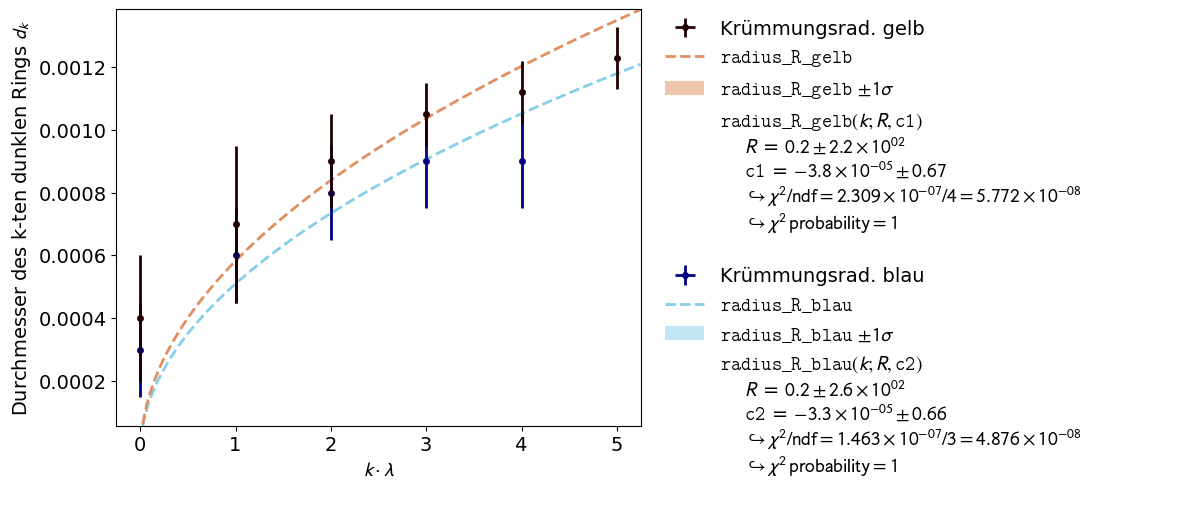

In [4]:
# Modell Funktion, k_lbda ist Ordnung * Wellenlänge des genutzten Lichts
def radius_R_gelb(k, R=.2, c1=-10**(-5)):
    return 2 * np.sqrt(k * R * lbda_gelb) + c1
def radius_R_blau(k, R=.2, c2=-10**(-5)):
    return 2 * np.sqrt(k * R * lbda_blau) + c2

data_gelb = kafe2.XYContainer( k[:unp.nominal_values(radien_newton_gelb).size], unp.nominal_values(2*radien_newton_gelb) )
data_blau = kafe2.XYContainer( k[:unp.nominal_values(radien_newton_blau).size], unp.nominal_values(2*radien_newton_blau) )
data_wasser = kafe2.XYContainer( k[:unp.nominal_values(radien_newton_wasser).size], unp.nominal_values(2*radien_newton_wasser) )

data_gelb.label = "Krümmungsrad. gelb" # Title
data_blau.label = "Krümmungsrad. blau" # Title

fit_gelb = kafe2.XYFit(xy_data = data_gelb, model_function = radius_R_gelb)
fit_blau = kafe2.XYFit(xy_data = data_blau, model_function = radius_R_blau)

fit_gelb.add_error(axis="y" , err_val=unp.std_devs(2*radien_newton_gelb))
fit_blau.add_error(axis="y" , err_val=unp.std_devs(2*radien_newton_blau))

fit_gelb.do_fit()
fit_blau.do_fit()

plot1 = kafe2.Plot([fit_gelb, fit_blau])
plot1.x_label , plot1.y_label = "$k\cdot \lambda$" , "Durchmesser des k-ten dunklen Rings $d_k$"
plot1.plot()
plot1.show()

Wir haben überhaupt keine Ahnung, warum die Fits nicht konvergieren. Die Werte haben eigentlich schon ein relativ Wurzelhaftes Verhalten, was man auch daran sieht, dass sich das Modell ziemlich gut and die Daten anpasst, allerdings sprechen eine $\chi^2$ probability von jeweils $1$ und jeweils eine Unsicherheit von $3$ (!!!) Größenordnungen größer als der bestimmte Krümmungsradius selbst dagegen. Der Wert für den Krümmungsradius, der bestimmt wurde, ist aber tatsächlich gar nicht so schlecht. Zur Übersicht im folgenden nochmal die Ergebnisse aufgelistet:  
Mit gelbem Licht  
- $R=(0.2\pm2.2\cdot 10^{2})\,m$  
- $c_1=(-3.8\cdot10^{-5}\pm0.67)\,m$  
- $\chi^2 \mathrm{\ probability}=1$  

Mit blauem Licht  
- $R=(0.2\pm2.6\cdot 10^{2})\,m$  
- $c_1=(-3.3\cdot10^{-5}\pm0.66)\,m$  
- $\chi^2 \mathrm{\ probability}=1$  

Da wir nichts besseres haben, müssen wir mit diesem Krümmungsradius in der 1.2 und 1.3 weiterrechnen. Wir können aber zumindest den Mittelwert der beiden bilden, dann reduziert sich zumindest die Unsicherheit etwas, bleibt aber in der selben Größenordnung.

### Aufgabe 1.2 Brechungsindex $n(\mathrm{H_{2}O})$ von Wasser

Bestimmen Sie den Brechungsindex $n(\mathrm{H_{2}O})$ von Wasser aus den veränderten Durchmessern der Newtonschen Ringe, wenn sich zwischen Linse und Objektträger Wasser statt Luft befindet.

---

Der Brechungsindex $n_W$ von Wasser lässt sich, leicht modifiziert, mit der selben Formel wir in 1.1 bestimmen. Dazu muss man beachten, dass Licht im Medium einen längeren Weg zurücklegt als im Vakuum, da sich die Lichtgeschwindigkeit im Medium ändert. Folgende Ersetzung wird dann notwendig: $\lambda \rightarrow \frac{\lambda}{n_W}$. Die Formel wird dann zu
$$d_k=2\sqrt{kR\frac{\lambda}{n_W}}+C$$

C:\Users\probz\AppData\Local\Temp\ipykernel_16756\1508649155.py:7: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_gelb / nW) + c3
C:\Users\probz\AppData\Local\Temp\ipykernel_16756\1508649155.py:7: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_gelb / nW) + c3


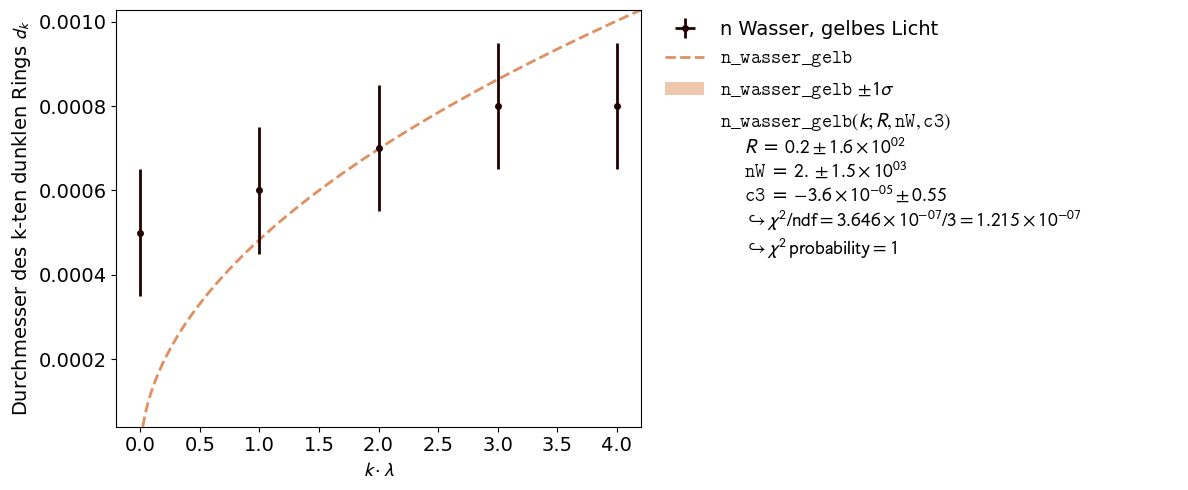

0.20000+/-170.29386


In [5]:
kr_rad1 = ufloat(0.2, 2.2 * 10**(2))
kr_rad2 = ufloat(0.2, 2.6 * 10**(2))
kr_rad = (kr_rad1+kr_rad2)/2

# Modell Funktion, 
def n_wasser_gelb(k, R=.2, nW=1.33, c3=-10**(-5)):
    return 2 * np.sqrt(k * R * lbda_gelb / nW) + c3

data_wasser = kafe2.XYContainer( k[:unp.nominal_values(radien_newton_wasser).size], unp.nominal_values(2*radien_newton_wasser) )

data_wasser.label = "n Wasser, gelbes Licht" # Title

fit_wasser = kafe2.XYFit(xy_data = data_wasser, model_function = n_wasser_gelb)

fit_wasser.add_error(axis="y" , err_val=unp.std_devs(2*radien_newton_wasser))
fit_wasser.add_parameter_constraint(name = "R", value = unp.nominal_values(kr_rad), uncertainty = unp.std_devs(kr_rad))

fit_wasser.do_fit()

plot2 = kafe2.Plot(fit_wasser)
plot2.x_label , plot2.y_label = "$k\cdot \lambda$" , "Durchmesser des k-ten dunklen Rings $d_k$"
plot2.plot()
plot2.show()
print(f"{kr_rad:.5f}")


Das Problem setzt sich fort, wir wissen immer noch nicht, warum das so ist. Es kann kaum sein, dass wir so extrem schlecht gemessen haben, da sich das Modell, wie schon gesagt, schon einigermaßen gut an die Messwerte anpasst. Warum die Unsicherheit auf den Brechungsindex trotzdem wieder $3$ Größenordnungen größer als der Wert selbst ist, ist uns völlig unklar. Wir erhalten als Brechungsindex von Wasser $n_W=(2.0\pm1500)$ und für die Güte des Fits $\chi^2\rm{\ probability}=1$

### Aufgabe 1.3 Brechungsindex $n_{L}$ der verwendeten Linse

 * Bestimmen Sie den Brechungsindex $n_{L}$ der verwendeten Linse. 
 * Bestimmen Sie hierzu zusätzlich zu $R$ die Brennweite $f$ der Linse mit Hilfe eines Aufbaus zur [Autokollimation](https://de.wikipedia.org/wiki/Autokollimation).

---

Dieser Aufgabenteil besteht aus zwei Teilen. Zuerst wurde die Autokollimation durchgeführt. Mit dieser Methode soll zunächst die Brennweite der Linse bestimmt werden. Dazu wird ein (bestenfalls selbstleuchtendes) Objekt (in unserem Fall ein Blatt Papier mit Löchern, das von hinten beschienen wird) durch die Linse auf einen Spiegel fokussiert, dort reflektiert und durch die Linse gespiegelt wieder auf sich selbst abgebildet. Die Linse wurde dann drei mal so eingestellt, dass das Bild wieder scharf gestellt ist und die Brennweite, also der Abstand zwischen Objekt und Linse, gemessen. Aus diesen drei Messwerten kann der gewichtete Mittelwert gebildet werden.  
Mit bekannter Brennweite und bekanntem Krümmungsradius der Linse lässt sich dann der Brechungsindex $n_L$ berechnen. Dazu nutzen wir folgende Formel:
$$R=(n_L-1)f$$
$$\Leftrightarrow n_L=\frac{R}{f}+1$$

In [6]:
f = unp.uarray([1.5-1.354, 1.5-1.3535, 1.5-1.353],[0.0015])
f_mean = ufloat( weighted_mean_gauss(f) , std_weighted_mean_gauss(f) )
n_L = kr_rad/f_mean + 1

print(f"Gewichteter Mittelwert der Brennweite: {f_mean:.3f} m")
print(f"Brechungsindex der Linse: {n_L:.1f}")

Gewichteter Mittelwert der Brennweite: 0.146+/-0.001 m
Brechungsindex der Linse: 2.4+/-1162.4


Wir erhalten für die Brennweite einen Wert von $f=(14.6\pm0.1)\,\rm{cm}$. Dieser Wert ist relativ gut, da er nicht von den schlechten Ergebnissen aus den Fits von oben abhängt. Anders sieht es mit dem Brechungsindex der Linse aus. Die Erwartung war ja, dass der Krümmungsradius, trotz der unfassbar hohen Unsicherheit, mit $20\,\rm{cm}$ doch relativ in Ordnung war, wir erhalten allerdings für den Brechungsindex der Linse folgenden Wert: $n_L=(2.4\pm1162.4)$. Zunächst ist der Wert selbst zu hoch, denn das Material, das einen ähnlichen Brechungsindex hat, ist, laut [Wikipedia](https://de.wikipedia.org/wiki/Brechungsindex#Brechungsindex_der_Luft_und_anderer_Stoffe), Diamant mit einem Brechunsindex von $2.42$. Es ist ziemlich wahrscheinlich, dass unsere Linse nicht aus Diamant bestand. Die Vermutung liegt nahe, dass es eher aus einem Glasähnlichen Material war. Natürlich ist nicht jedes Glas gleich, die Brechungsindizes verschiedener Glasarten bewegen sich laut Wikipedia wohl aber zwischen $1.45$ und $2.14$, also immer noch unter unserem Wert. Der Grund, warum unser Ergebnis so hoch ausfällt, liegt sehr sicher daran, dass der Krümmungsradius zu hoch ist, denn die Brennweite ist mit hoher Sicherheit relativ gut bestimmt worden. Die riesige Unsicherheit kommt dann natürlich auch durch die große Unsicherheit auf den, im Verhältnis, geringen Krümmungsradius. Warum das aber so ist, ist leider immer noch unklar.

## Aufgabe 2: Messungen mit dem Gitterspektrometer

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie Wellenlängen die dominanten Spektrallinien einer $\mathrm{Na}$- und einer $\mathrm{Zn}$-Spektrallampe mit Hilfe eines Gitterspektrometers.
 * Bearbeiten Sie hierzu die folgenden Aufgaben.
 
---


### Aufgabe 2.1: Justierung der Apparatur

 * Justieren Sie die Apparatur. 
 * Beschreiben Sie Ihr Vorgehen und dokumentieren Sie die wichtigsten numerischen Einstellungen. 

---

Die vorliegende Apparatur bestand aus einer Natrium- beziehungsweise einer Zinkdampflampe, die einen Spalt beleuchteten, der sich an der Kante eines Tisches befand. Im Zentrum dieses Tisch befand sich eine drehbare Halterung für ein optisches Gitter und am Rand ein Fernrohr, welches um den Tisch herum verschoben werden konnte. Der Winkel in dem das Fernrohr zur Halterung stand konnte mithilfe eines Goniometers auf dem Tisch bestimmt werden, welches jedoch zu Beginn justiert werden musste.

Die Justierung des Goniometers wurde durchgeführt, indem ohne Gitter der Spalt in das Fadenkreuz des Rohres gebracht wurde. Hierfür konnte der Spalt möglichst schmal eingestellt werden. Nun wurde in dieser Konstellation das Goniometer genullt, da sich Fernrohr und Gitter genau gegenüber gestanden hätten. 

---

### Aufgabe 2.2: Bestimmung der Gitterkonstanten $g$ eines Gitters. 

 * Bestimmen Sie die Gitterkonstante $g$ des Gitter mit ${\approx}600$ Strichen pro $\mathrm{mm}$ mit Hilfe der $\mathrm{Na}$-Spektrallampe
 * Beachten Sie die Hinweise zu dieser Teilaufgabe in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md) und beantworten Sie zur Vorbereitung der Messung die folgenden Fragen: 
     1. Unter welchen Winkeln erwarten Sie die Hauptmaxima?
     2. Werden diese u.U. durch Minima des Beugungsbilds am Einzelspalt ausgelöscht?
     3. Welche Breite erwarten Sie für die Maxima?
     4. Welches Intensitätsverhältnis erwarten Sie für die Maxima?
     5. Mit welcher Breite müssen Sie das Gitter beleuchten, um die $\mathrm{Na}$-D-Linien auflösen zu können?
 
---

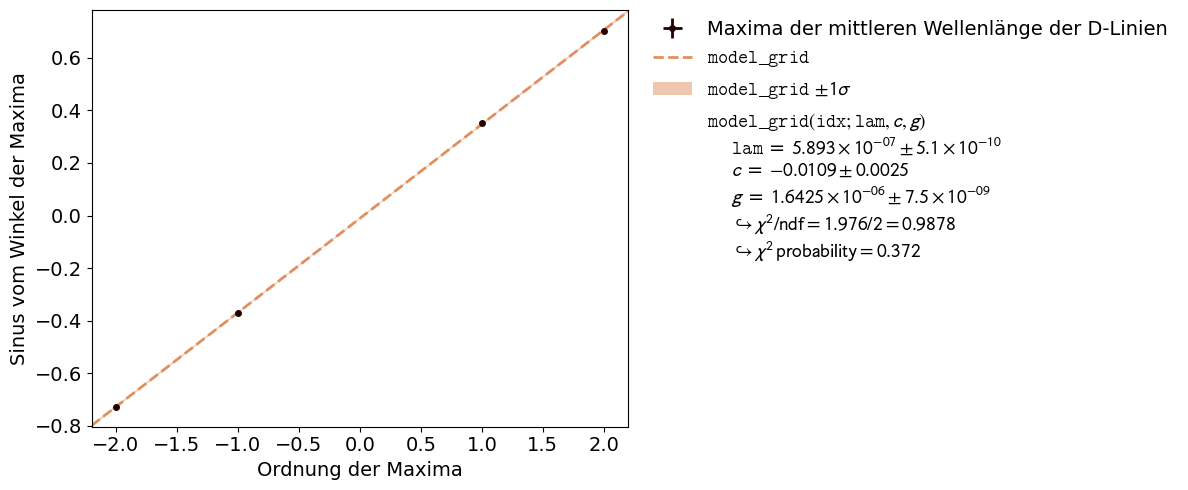

die Gitterkonstante des Gitters beträgt g = 1/(608.8+/-2.8) 1/mm


In [7]:
# Messungen: Maximum 1. und 2. Od. jeweils für die mittlere Wellenlänge in Grad
na_mid_g1 = unp.uarray([313+9/60-360, 338.5-13/60-360, 20.5+12/60, 44.5+8/60], [0.3/60])
idx = np.array([-2,-1,1,2])

# Definition eines Modells
def model_grid(idx,lam,c=0,g=1/600000):
    return idx * lam / g + c

# Definition der Daten für den Fit
xy_data = kafe2.XYContainer(idx,np.sin(np.radians(unp.nominal_values(na_mid_g1))))
xy_data.label = 'Maxima der mittleren Wellenlänge der D-Linien'
xy_data.axis_labels = ('Ordnung der Maxima','Sinus vom Winkel der Maxima')

# Durchführen des Fits
fit_g1 = kafe2.XYFit(xy_data, model_grid)
fit_g1.add_error('y',err_val=unp.std_devs(na_mid_g1))
fit_g1.add_parameter_constraint(name='lam', value=589.3*10**-9, uncertainty=0.5*10**-9)
fit_g1.do_fit()

# Plotten des Fits
plot = kafe2.Plot(fit_g1)
plot.plot()
plot.show()

# Umrecehnung von g
g_1 = ufloat(fit_g1.parameter_values[2], fit_g1.parameter_errors[2])
g_inv = 1 / (g_1 * 1000)
print(f'die Gitterkonstante des Gitters beträgt g = 1/({g_inv}) 1/mm')

Fragen zur Vorbereitung der Messung:
- Die Hauptmaxima werden erwartet unter den Winkeln $\alpha = arcsin(m\cdot \frac{\lambda}{g})$. Es muss somit gelten, dass $\alpha \in \{\pm 20.7°, \pm 45°\}$
- Die Maxima werden nicht durch Einzelspaltinterferenz ausgelöscht, da $\frac{b}{g} \approx 0.9$, wodurch das Maximum 10. Ordnung ausfällt. Da jedoch nur bis zur 2. Ordnung beobachtet werden kann, fällt keines der vorhandenen Maxima aus.
- Der Großteil der Linienbreite entsteht aus der doppelten Na-D-Linie, deren mittlere Wellenlänge hier gemessen wird. Somit wird eine Breite von $\delta \lambda \approx 0.5nm$ erwartet.
- Die veränderliche Intensität der Maxima wird erzeugt durch die Einhüllender der Einzelspaltinterferenz. Wir erwarten also einen monotonen Abfall der Intensität, je größer $|\alpha|$
- Wir erhalten die benötigte Beleuchtungsbreite aus $\frac{\lambda}{\Delta \lambda \cdot m} = N \approx 600$ weshalb wir ungefähr $1mm$ der Gitters beleuchten müssen um die D-Linien mindestens im Maximum zweiter Ordnung auflösen zu können. 

In dieser Teilaufgabe wird die Gitterkonstante eines optischen Gitters mithilfe des oben kalibrierten Spektrometers gemessen. Hierfür wird der Spalt mit Licht einer Na-Dampflampe beleuchtet. Der Spalt ist hierbei so weit geöffnet, dass die Doppellinie zu einer Linie verschwimmt, was dafür sorgt, dass die Maxima zweiter Ordnung gut beobachtbar sind. Somit wird auch die Unsicherheit der Wellenlänge $\Delta\lambda = \pm 0.5nm$ mit Hilfe des Wellenlängenabstandes der Vorbereitung festgelegt. 

Zur eigentlichen Bestimmung von g wird $sin(\alpha)$ der Maxima gegenüber der Ordnung des Maximums aufgetragen und das Modell $sin(\alpha) = m \cdot \frac{\lambda}{g} + C$ eingepasst. 

Die Anpassung selbst liegt in einem akzeptablen Bereich mit $\chi^2 = 0.988$, wobei für die Unsicherheit des Winkels $0.2$ Minuten gewählt wurden. 
Somit beträgt das erhaltene Ergebnis:

$$g = \frac{1}{608.8 \pm 1.9} \frac{1}{mm}$$

---

### Aufgabe 2.3 Vermessung der $\mathrm{Na}$-D-Doppellinie

 * Bestimmen Sie den Wellenlängenabstand der [$\mathrm{Na}$-D-Doppellinie](https://de.wikipedia.org/wiki/Natrium-D-Linie).
 * Verwenden Sie hierzu das Gitter von **Aufgabe 2.2** und die Feineinstellung der Winkelskala am Spektrometer. Beachten Sie, dass diese Skala zuvor geeicht werden muss.

---

In [8]:
# Einlesen der Messwerte
na_lower = ufloat(46.5-23/60, 1/60)
na_higher = ufloat(46.5-25/60, 1/60)

# Berechnugn der Wellenlängen
delta_lambda = g_1 * (unp.sin(na_lower * np.pi/180) - unp.sin(na_higher * np.pi/180))/2

print(f'Die Wellenlängen unterscheiden sich um {delta_lambda * 10**9} nm')

Die Wellenlängen unterscheiden sich um 0.33+/-0.23 nm


Aus der bestimmten Gitterkonstante und der getrennten Auflösung der Na-D-Linien wird nun der Wellenlängenabstand dieser Linein ermittelt. Hierfür werden die Winkel der Maxima von beiden Linien einzeln gemessen und danach über die bereits verwendete Formel $sin(\alpha) = m \cdot \frac{\lambda}{g}$ in die jeweiligen Wellenlängen umgerechnet. Durch Bildung der Differenz erhält man den Wert:

$$\delta \lambda = 0.33nm \pm 0.23nm$$

Der Wert, der sich mittels der Wellenlängen aus der Vorbereitung ermitteln lässt, befindet sich in der $\sigma$-Umgebung des Gemessenen. Außerdem liegt eine sehr große Unsicherheit vor, da die Ableseungenauigkeit des Goniometers im Bereich der Winkeldifferenz der Maxima liegt. 

### Aufgabe 2.4 Bestimmung der Gitterkonstanten $g'$ eines zweiten Gitters

 * Bestimmen Sie die Gitterkonstante $g'$ eines zweiten Gitters mit ${\approx}140$ Strichen pro $\mathrm{mm}$.
 * Beachten Sie die Hinweise zu dieser Teilaufgabe in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md) und beantworten Sie in Ihrer Auswertung die folgenden Fragen: 
    1. Das Gitter kann bis bis zu 6. Ordnung mit monoton abnehmender Intensität in jeder Ordnung beobachtet werden. Was lässt sich aus dieser Beobachtung über $b$ schlussfolgern?
    2. Von welcher Ordnung ab ist die $\mathrm{Na}$-D-Linie getrennt beobachtbar?
    3. Ist Ihre Beobachtung konsistent mit dem erwarteten Auflösungsvermögen?

---

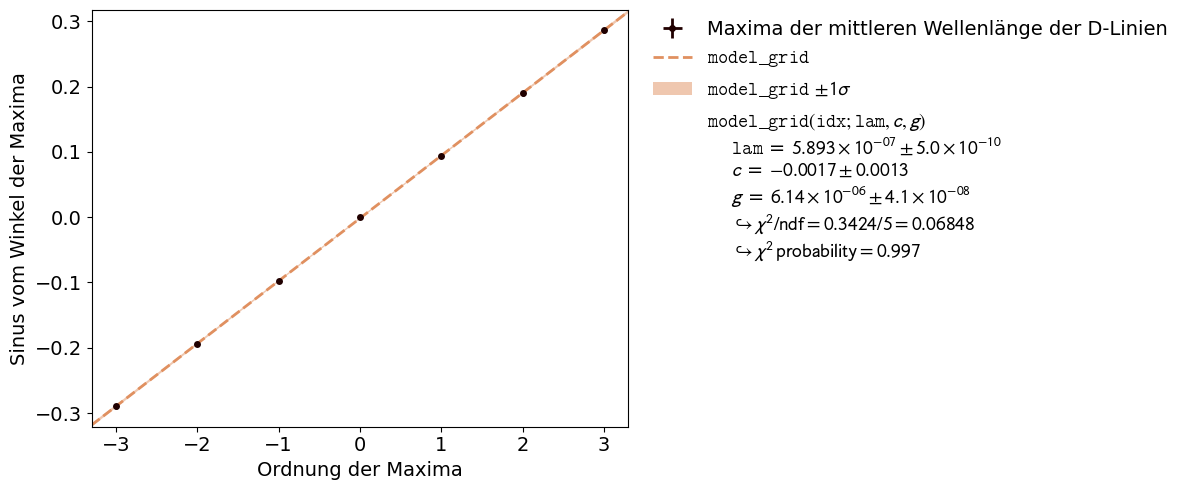

die Gitterkonstante des Gitters beträgt g = 1/(162.9+/-1.1) 1/mm


In [9]:
# Messungen: Maximum 1., 2. und 3. Od. jeweils für die mittlere Wellenlänge in Grad
na_mid_g2 = unp.uarray([343.0 + 9/60 - 360, 348.5 + 19/60 - 360, 354.0 + 22/60 - 360, 0, 5.0 + 23/60, 10.5 + 26/60, 16.5 + 8/60], [0.2/60])
idx = np.array([-3,-2,-1,0,1,2,3])

# Definition eines Modells
def model_grid(idx,lam,c=0,g=1/600000):
    return idx * lam / g + c

# Definition der Daten für den Fit
xy_data = kafe2.XYContainer(idx,np.sin(np.radians(unp.nominal_values(na_mid_g2))))
xy_data.label = 'Maxima der mittleren Wellenlänge der D-Linien'
xy_data.axis_labels = ('Ordnung der Maxima','Sinus vom Winkel der Maxima')

# Durchführen des Fits
fit_g2 = kafe2.XYFit(xy_data, model_grid)
fit_g2.add_error('y',err_val=unp.std_devs(na_mid_g2))

fit_g2.add_parameter_constraint(name='lam', value=589.3*10**-9, uncertainty=0.5*10**-9)
fit_g2.do_fit()

# Plotten des Fits
plot = kafe2.Plot(fit_g2)
plot.plot()
plot.show()

# Umrecehnung von g
g_2 = ufloat(fit_g2.parameter_values[2], fit_g2.parameter_errors[2])
g_inv = 1 / (g_2 * 1000)
print(f'die Gitterkonstante des Gitters beträgt g = 1/({g_inv}) 1/mm')

Hier wird erneut die Gitterkonstante mihilfe des Verfahrens aus Aufgabe 2.1 bestimmt. Das hier jedoch mehr Maxima sichtbar sind, werden nun die Maxima bis zur dritten Ordnung verwendet und ebenfalls das Modell $sin(\alpha) = m \cdot \frac{\lambda}{g}$ eingepasst.

Hierbei liegt der Fit erneut in einem akzeptablen Bereich mit $\chi^2 = 0.00685$. Es wird der Wert erhalten:

$$g = \frac{1}{162.9 \pm 1.1} \frac{1}{mm}$$

Da die Maxima der ersten 6 Ordnungen in abnehmender Intensität zu beobachten sind, wird keines durch die Einzelspaltinterferenz ausgelöscht. Somit muss $b \ll g$ gelten. 

Eine Aufspaltung der Natrium-D-Linien ist leicht zu beobachten ab dem Maximum 3. Ordnung, wird jedoch beim Maximum 4. Ordnung stärker. Nach $\frac{\lambda}{\Delta \lambda} = mN$ müssten sich für unsere Spaltbreite von $2mm$ ergeben, dass die D-Linien ca. ab dem Maximum 4. Ordnung unterscheidbar sind, was den gemachten Beobachtungen entspricht.

### Aufgabe 2.5: Linienspektrum der $\mathrm{Zn}$-Spektrallampe

 * Bestimmen Sie die Wellenlängen der vier deutlich erkennbaren Linien der $\mathrm{Zn}$-Spektrallampe. Die Farben sind violettblau, blau, blaugrün und rot. 
 * Begründen und dokumentieren Sie Ihre Wahl der Mittel und der Methode in Ihrer Auswertung.

---

In [10]:
# von Violettblau nach Rot, absteigende Wellenlänge
zn_links = unp.uarray([ 16.0 + 20/60 , 16.5 + 28/60 , 16.5 + 18/60 , 22.5 + 0/60 ], [0.1])
zn_rechts = unp.uarray([ 343.0 + 21/60 - 360 , 343.0 + 15/60 - 360 , 342.5 + 23/60 - 360 , 337.0 + 7/60 - 360], [0.1])

# violet = unp.uarray([16. + 20/60, 0, 343. + 21/60 - 360], [0.1]) * np.pi/180
# blue = unp.uarray([16.5 + 28/60, 0, 343 + 15/60 -360], [0.1]) * np.pi/180
# blgreen = unp.uarray([16.5 + 18/60, 0, 342.5 + 23/60 - 360], [0.1]) * np.pi/180
# red = unp.uarray([22.5, 0, 337. + 7/60 -360], [0.1]) * np.pi/180

m = [1,0,-1]

# definieren eines Modells
def model_lam(idx,g,c=0,lam=10**-9):
    return idx * lam / g + c


# Erstellen der Container
label = 'Winkel und Ordnung der Maxima'
axis = ('Ordnung','Winkel in °')

violet_data = kafe2.XYContainer(m,unp.nominal_values(violet))
violet_data.axis_labels = axis
violet_data.label = label

blue_data = kafe2.XYContainer(m,unp.nominal_values(blue))
blue_data.axis_labels = axis
blue_data.label = label

blgreen_data = kafe2.XYContainer(m,unp.nominal_values(blgreen))
blgreen_data.axis_labels = axis
blgreen_data.label = label

red_data = kafe2.XYContainer(m,unp.nominal_values(red))
red_data.axis_labels = axis
red_data.label = label

# erstellen der Fits
fit_violet = kafe2.XYFit(violet_data,model_lam)
fit_violet.add_error(axis='y', err_val=unp.std_devs(violet))
fit_violet.add_parameter_constraint('g',g_1.n,g_1.s)

fit_blue = kafe2.XYFit(blue_data,model_lam)
fit_blue.add_error(axis='y', err_val=unp.std_devs(blue))
fit_blue.add_parameter_constraint('g',g_1.n,g_1.s)

fit_blgreen = kafe2.XYFit(blgreen_data,model_lam)
fit_blgreen.add_error(axis='y', err_val=unp.std_devs(blgreen))
fit_blgreen.add_parameter_constraint('g',g_1.n,g_1.s)

fit_red = kafe2.XYFit(red_data,model_lam)
fit_red.add_error(axis='y', err_val=unp.std_devs(red))
fit_red.add_parameter_constraint('g',g_1.n,g_1.s)

# ausführend der Fits und Plotten
fit_violet.do_fit()
fit_blue.do_fit()
fit_blgreen.do_fit()
fit_red.do_fit()

plot = kafe2.plot([fit_violet,fit_blue,fit_blgreen,fit_red])

NameError: name 'violet' is not defined

Beleuchten wir den Spalt nun mit einer Zn-Dampflampe können wir die Wellenlängen der verschiedenen Spektrallinien messen. Durchgeführt wird diese Rechnung erneut durch Einpassen des Modells $sin(\alpha) = m \cdot \frac{\lambda}{g}$. 

Ausgewählt wurde hierfür das Gitter mit $g = \frac{1}{608.8 \pm 1.9} \frac{1}{mm}$, da wir hier zwar weniger Maxima beobachten, aber weniger Fehler auf den einzelnen Messungen liegen. 

Die Fits liegen in einem akzeptablen Bereich mit $\chi^2 < 2.5$ und wir erhalten somit:

| Farbe | $\lambda (nm)$ | $\lambda_{lit} (nm)$ | rel. Abweichung |
|---|---|---|---|
| violett | 472.8 $\pm$ 2.5| 468.01 | 1.02% |
| blau | 483.3 $\pm$ 2.5 | 472.22 | 2.34% |
| blaugrün | 486.2 $\pm$ 2.5| 481.05 | 1.07% |
| rot | 650.5 $\pm$ 2.8 | 636.01 | 2.28% |

Die ermittelten Werte liegen in den Bereichen der Literaturwerte. 


---